ETL

---



In [52]:
# ETAPA 1 - Importar bibliotecas necessárias
import pandas as pd
import requests

# ETAPA 2 - URL dos dados (formato raw JSON)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# ETAPA 3 - Requisição dos dados via API (GitHub) e conversão para JSON
try:
    response = requests.get(url)
    response.raise_for_status()  # Verifica se a requisição foi bem sucedida
    data_json = response.json()  # Converte o JSON em dicionário Python
except requests.exceptions.RequestException as e:
    print(f"Erro ao fazer a requisição: {e}")
    data_json = None

# ETAPA 4 - Carregar os dados em um DataFrame do Pandas, se a requisição for bem sucedida
if data_json:
    # "Explode" os dados aninhados e substitui "." no nome das colunas
    df = pd.json_normalize(data_json, sep='.')
    # ETAPA 5 - Visualizar as primeiras linhas
    print("DataFrame carregado com sucesso. Primeiras 5 linhas:")
    display(df.head())
else:
    print("Não foi possível carregar os dados. DataFrame vazio.")
    df = pd.DataFrame() # Cria um DataFrame vazio em caso de erro

DataFrame carregado com sucesso. Primeiras 5 linhas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [53]:
# URL do dicionário de dados (formato markdown raw do GitHub)
url_dicionario = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_dicionario.md"

# Requisição do dicionário de dados
try:
    response_dicionario = requests.get(url_dicionario)
    response_dicionario.raise_for_status() # Verifica se a requisição foi bem sucedida
    dicionario_md = response_dicionario.text
    print("Dicionário de dados carregado com sucesso. Primeiros 500 caracteres:")
    print(dicionario_md[:500])  # exibe os primeiros 500 chars
except requests.exceptions.RequestException as e:
    print(f"Erro ao carregar o dicionário de dados: {e}")
    dicionario_md = ""

Dicionário de dados carregado com sucesso. Primeiros 500 caracteres:
#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLin


In [54]:
# Verificar colunas e seus tipos de dados
print("Colunas e tipos de dados:\n")
print(df.dtypes)

# Verificar colunas aninhadas (algumas colunas são dicionários) - Já tratadas com pd.json_normalize
# Para entender a estrutura, podemos visualizar uma amostra do DataFrame
print("\nVisualizar uma linha para entender a estrutura do DataFrame:")
if not df.empty:
    display(df.iloc[0])
else:
    print("DataFrame vazio. Não é possível visualizar a estrutura.")

Colunas e tipos de dados:

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Visualizar uma linha para entender a estrutura do DataFrame:


,0
customerID,0002-ORFBO
Churn,No
customer.gender,Female
customer.SeniorCitizen,0
customer.Partner,Yes
customer.Dependents,Yes
customer.tenure,9
phone.PhoneService,Yes
phone.MultipleLines,No
internet.InternetService,DSL


In [55]:
# Este código já foi incorporado e melhorado na célula de carregamento de dados (ETAPA 3 e 4)
# Portanto, esta célula pode ser removida ou mantida apenas para referência, mas sua funcionalidade principal já foi executada.
# Vamos adicionar um comentário indicando isso.

# Carregar os dados diretamente da API (link raw do GitHub)
# Este passo já foi executado na célula anterior (carga de dados inicial), que foi melhorada.
# Manter esta célula apenas para registro do processo anterior.

# url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
# response = requests.get(url)
# data_json = response.json()  # lista de dicionários

# Flatten dos dados aninhados corretamente
# df = pd.json_normalize(
#     data_json,
#     sep='.',  # substitui "." no nome das colunas
# )

# Verificar primeiras colunas
print("Verificação das colunas após o carregamento (executado na célula anterior):")
if not df.empty:
    print("Colunas carregadas:\n", df.columns.tolist())
    print("Formato final do DataFrame:", df.shape)
else:
    print("DataFrame vazio. Não é possível verificar as colunas.")

Verificação das colunas após o carregamento (executado na célula anterior):
Colunas carregadas:
 ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Formato final do DataFrame: (7267, 21)


In [56]:
# Verificar valores ausentes
print("\n🔍 Valores ausentes por coluna:")
display(df.isnull().sum())

# Verificar valores vazios (string vazia) nas colunas do tipo 'object'
print("\n🔍 Valores vazios (strings vazias):")
# Filtrar apenas colunas do tipo 'object' antes de verificar strings vazias
colunas_object = df.select_dtypes(include='object').columns
if not colunas_object.empty:
    display((df[colunas_object] == '').sum())
else:
    print("Não há colunas do tipo 'object' para verificar strings vazias.")


# Verificar duplicatas
print("\n🔍 Linhas duplicadas:")
print(f"Total de linhas duplicadas: {df.duplicated().sum()}")

# Verificar tipos de dados
print("\n🔍 Tipos de dados:")
display(df.dtypes)

# Verificar valores únicos das categorias principais
colunas_categoricas_verificar = [
    'Churn',
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

print("\n🔍 Valores únicos por coluna categórica (amostra):")
if not df.empty:
    for coluna in colunas_categoricas_verificar:
        if coluna in df.columns:
            # Exibir apenas os primeiros 50 valores únicos para evitar poluição visual em colunas com muitos valores
            unique_values = df[coluna].unique()
            if len(unique_values) > 50:
                print(f"{coluna}: {unique_values[:50]}...")
            else:
                print(f"{coluna}: {unique_values}")
        else:
            print(f"{coluna}: ❌ Coluna não encontrada no DataFrame.")
else:
    print("DataFrame vazio. Não é possível verificar valores únicos.")


🔍 Valores ausentes por coluna:


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



🔍 Valores vazios (strings vazias):


,0
customerID,0
Churn,224
customer.gender,0
customer.Partner,0
customer.Dependents,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0
internet.OnlineBackup,0



🔍 Linhas duplicadas:
Total de linhas duplicadas: 0

🔍 Tipos de dados:


,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object



🔍 Valores únicos por coluna categórica (amostra):
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [57]:
# 🔧 1. Remover registros com Churn vazio ou nulo
df_limpo = df.copy() # Criar uma cópia para não modificar o DataFrame original diretamente no início da limpeza
df_limpo = df_limpo[df_limpo['Churn'].notnull()]
df_limpo = df_limpo[df_limpo['Churn'] != '']

# 🔧 2. Remover linhas duplicadas, se houver
df_limpo = df_limpo.drop_duplicates()

# 🔧 3. Corrigir formatação de colunas categóricas (remover espaços e padronizar capitalização)
colunas_categoricas = [
    'Churn',
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

for col in colunas_categoricas:
    if col in df_limpo.columns:
        # Aplicar strip() para remover espaços e title() para padronizar a capitalização
        df_limpo[col] = df_limpo[col].astype(str).str.strip().str.title()

# 🔧 4. Converter colunas numéricas ('account.Charges.Monthly' e 'account.Charges.Total')
# Usar errors='coerce' para converter valores não numéricos em NaN
df_limpo['account.Charges.Monthly'] = pd.to_numeric(df_limpo['account.Charges.Monthly'], errors='coerce')
df_limpo['account.Charges.Total'] = pd.to_numeric(df_limpo['account.Charges.Total'], errors='coerce')

# 🔧 5. Preencher possíveis NaNs nos valores numéricos (gerados pelo coerce) com 0
# Pode-se considerar outras estratégias como preencher com a média ou mediana dependendo da análise
df_limpo['account.Charges.Monthly'] = df_limpo['account.Charges.Monthly'].fillna(0)
df_limpo['account.Charges.Total'] = df_limpo['account.Charges.Total'].fillna(0)


# 🔧 6. Garantir que tenure e SeniorCitizen sejam inteiros
df_limpo['customer.tenure'] = df_limpo['customer.tenure'].astype(int)
df_limpo['customer.SeniorCitizen'] = df_limpo['customer.SeniorCitizen'].astype(int)

# ✅ Mostrar resultado final da limpeza
print("✔️ Dados limpos! Preview:")
display(df_limpo.head())

# Atualizar o DataFrame original com os dados limpos
df = df_limpo.copy()

✔️ Dados limpos! Preview:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40


In [58]:
# Criar a coluna Contas_Diarias a partir do valor mensal
# Verificar se a coluna 'account.Charges.Monthly' existe e não está vazia
if 'account.Charges.Monthly' in df.columns and not df['account.Charges.Monthly'].empty:
    df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
    # Exibir amostra para ver se está correto
    print("✔️ Coluna 'Contas_Diarias' criada com sucesso!")
    display(df[['account.Charges.Monthly', 'Contas_Diarias']].head())
else:
    print("❌ Não foi possível criar a coluna 'Contas_Diarias'. Coluna 'account.Charges.Monthly' ausente ou vazia.")

✔️ Coluna 'Contas_Diarias' criada com sucesso!


,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [59]:
# 🔍 Estatísticas descritivas básicas das colunas numéricas
print("📊 Estatísticas descritivas gerais:")
# Verificar se o DataFrame não está vazio antes de calcular as estatísticas
if not df.empty:
    display(df.describe().T)
else:
    print("DataFrame vazio. Não é possível calcular estatísticas descritivas.")

📊 Estatísticas descritivas gerais:


,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
customer.tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
account.Charges.Monthly,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
account.Charges.Total,7043.0,2279.734304,2266.794470,0.000000,398.550000,1394.550,3786.600,8684.800000
Contas_Diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333


In [60]:
print("📌 Medianas das colunas numéricas:")
# Verificar se o DataFrame não está vazio antes de calcular as medianas
if not df.empty:
    display(df.median(numeric_only=True))
else:
    print("DataFrame vazio. Não é possível calcular as medianas.")

📌 Medianas das colunas numéricas:


,0
customer.SeniorCitizen,0.000
customer.tenure,29.000
account.Charges.Monthly,70.350
account.Charges.Total,1394.550
Contas_Diarias,2.345


In [61]:
print("📌 Clientes por status de evasão (Churn):")
# Verificar se a coluna 'Churn' existe e o DataFrame não está vazio
if 'Churn' in df.columns and not df.empty:
    display(df['Churn'].value_counts())
else:
    print("❌ Coluna 'Churn' ausente ou DataFrame vazio. Não é possível contar os clientes por status de evasão.")

📌 Clientes por status de evasão (Churn):


,count
Churn,
No,5174
Yes,1869


In [62]:
print("📌 Média de gasto mensal por tipo de contrato:")
# Verificar se as colunas necessárias existem e o DataFrame não está vazio
if 'account.Contract' in df.columns and 'account.Charges.Monthly' in df.columns and not df.empty:
    display(df.groupby('account.Contract')['account.Charges.Monthly'].mean())
else:
    print("❌ Colunas necessárias ausentes ou DataFrame vazio. Não é possível calcular a média de gasto mensal por tipo de contrato.")

📌 Média de gasto mensal por tipo de contrato:


,account.Charges.Monthly
account.Contract,
Month-To-Month,66.398490
One Year,65.048608
Two Year,60.770413


In [63]:
print("📌 Desvio padrão do valor diário (Contas_Diarias):")
# Verificar se a coluna 'Contas_Diarias' existe e o DataFrame não está vazio
if 'Contas_Diarias' in df.columns and not df.empty:
    print(df['Contas_Diarias'].std())
else:
    print("❌ Coluna 'Contas_Diarias' ausente ou DataFrame vazio. Não é possível calcular o desvio padrão.")

📌 Desvio padrão do valor diário (Contas_Diarias):
1.0030015699226154


📊 Visualização da Proporção de Clientes por Churn:


/tmp/ipython-input-494370319.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


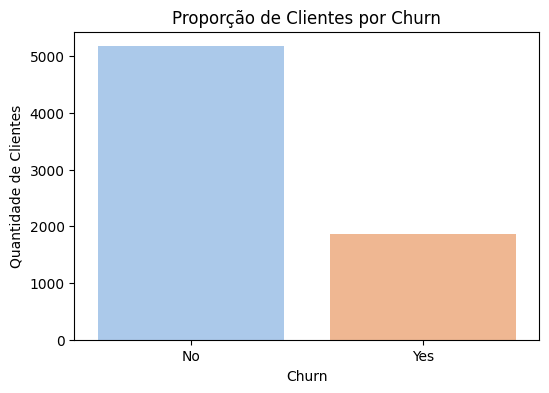

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Visualização da Proporção de Clientes por Churn:")

# Verificar se a coluna 'Churn' existe e o DataFrame não está vazio
if 'Churn' in df.columns and not df.empty:
    # Calcular as contagens de Churn
    counts = df['Churn'].value_counts()

    plt.figure(figsize=(6,4))
    # Usar a paleta "pastel" do seaborn
    sns.barplot(x=counts.index, y=counts.values, palette="pastel")
    plt.title('Proporção de Clientes por Churn')
    plt.xlabel('Churn')
    plt.ylabel('Quantidade de Clientes')
    plt.show()
else:
    print("❌ Não é possível gerar o gráfico de Churn. Coluna 'Churn' ausente ou DataFrame vazio.")


📊 Visualização da Distribuição de Churn por Gênero:


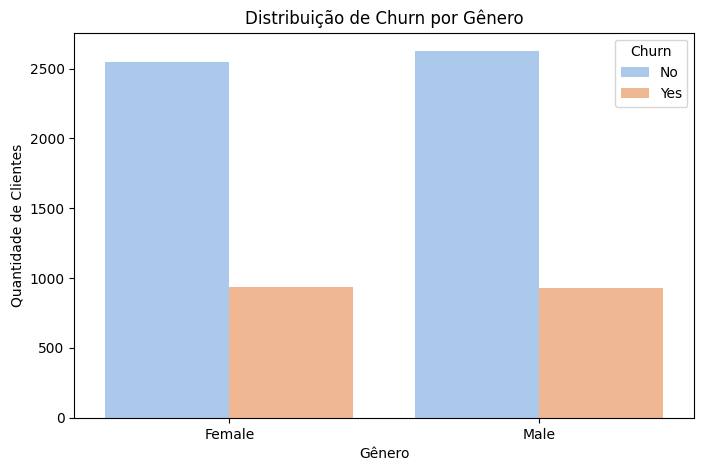

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Visualização da Distribuição de Churn por Gênero:")

# Verificar se as colunas 'customer.gender' e 'Churn' existem e o DataFrame não está vazio
if 'customer.gender' in df.columns and 'Churn' in df.columns and not df.empty:
    plt.figure(figsize=(8,5))
    sns.countplot(x='customer.gender', hue='Churn', data=df, palette='pastel')
    plt.title('Distribuição de Churn por Gênero')
    plt.xlabel('Gênero')
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Churn')
    plt.show()
else:
    print("❌ Não é possível gerar o gráfico de Churn por Gênero. Colunas necessárias ausentes ou DataFrame vazio.")


📊 Visualização da Distribuição de Total Gasto e Tempo de Contrato por Churn (Boxplots):


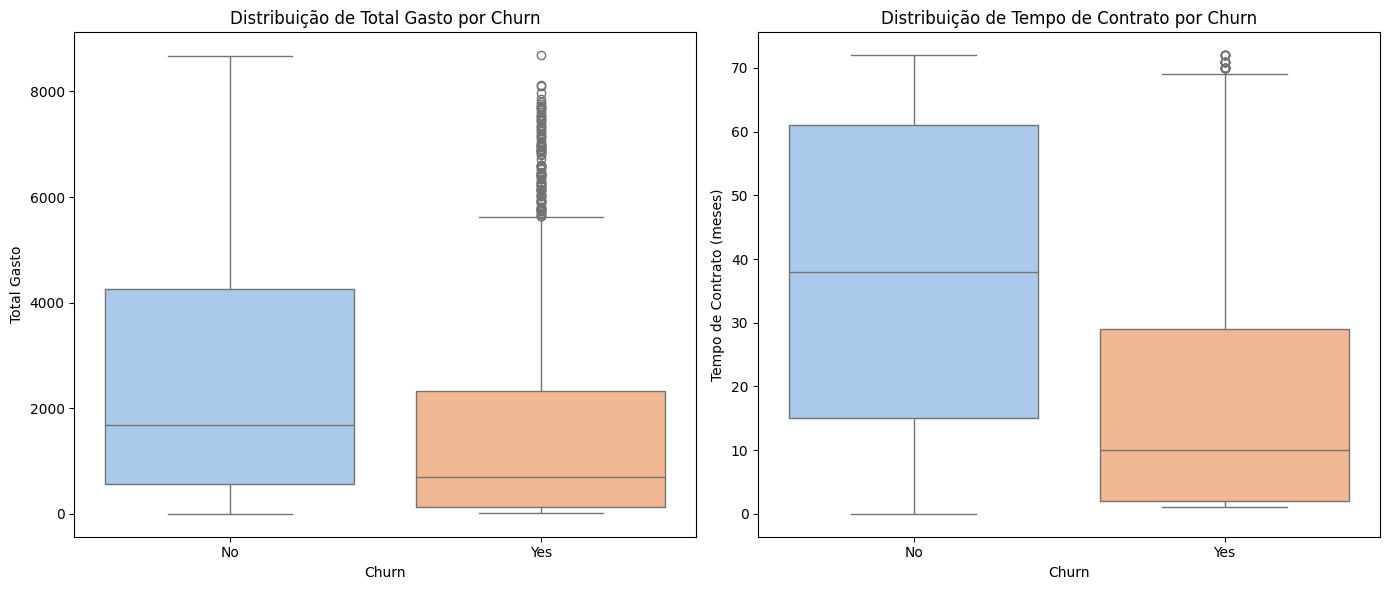

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Visualização da Distribuição de Total Gasto e Tempo de Contrato por Churn (Boxplots):")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
colunas_analise = ['account.Charges.Total', 'customer.tenure', 'Churn']
if all(col in df.columns for col in colunas_analise) and not df.empty:
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Boxplot para total gasto
    sns.boxplot(x='Churn', y='account.Charges.Total', hue='Churn', data=df, palette='pastel', ax=axes[0], legend=False)
    axes[0].set_title('Distribuição de Total Gasto por Churn')
    axes[0].set_xlabel('Churn')
    axes[0].set_ylabel('Total Gasto')

    # Boxplot para tempo de contrato
    sns.boxplot(x='Churn', y='customer.tenure', hue='Churn', data=df, palette='pastel', ax=axes[1], legend=False)
    axes[1].set_title('Distribuição de Tempo de Contrato por Churn')
    axes[1].set_xlabel('Churn')
    axes[1].set_ylabel('Tempo de Contrato (meses)')

    plt.tight_layout()
    plt.show()
else:
    print("❌ Não é possível gerar os boxplots. Colunas necessárias ausentes ou DataFrame vazio.")


📊 Visualização da Distribuição de Total Gasto e Tempo de Contrato por Churn (Violinplots):


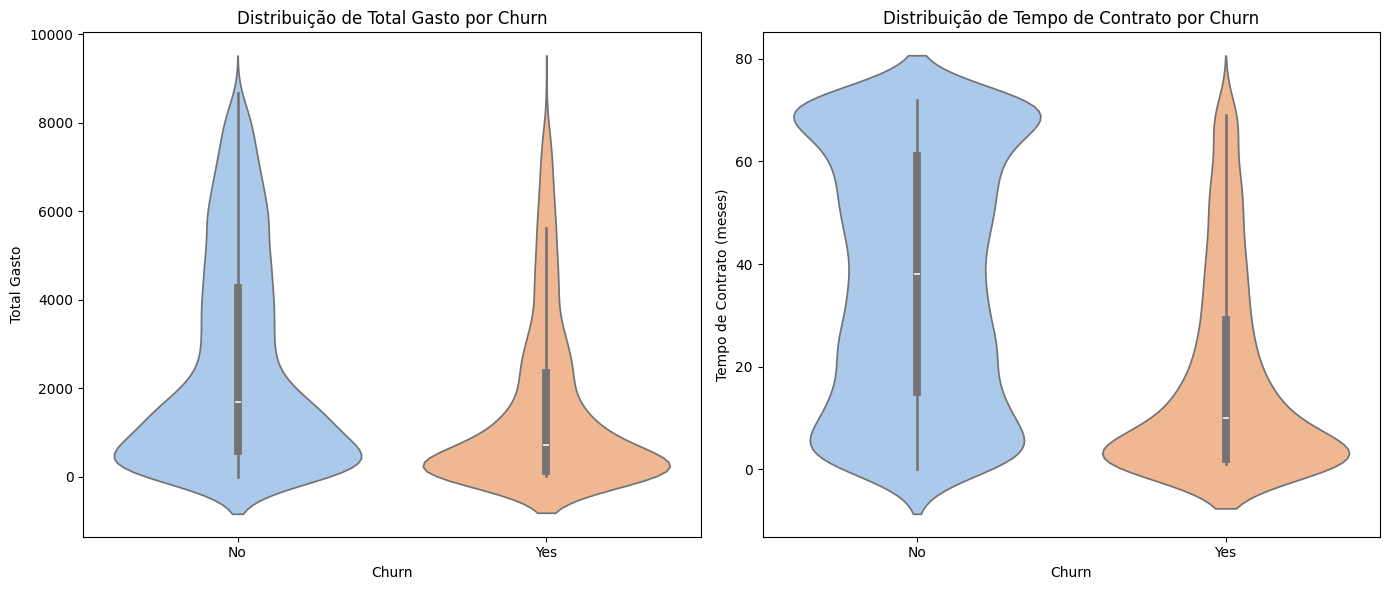

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Visualização da Distribuição de Total Gasto e Tempo de Contrato por Churn (Violinplots):")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
colunas_analise = ['account.Charges.Total', 'customer.tenure', 'Churn']
if all(col in df.columns for col in colunas_analise) and not df.empty:
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Violinplot para total gasto
    sns.violinplot(x='Churn', y='account.Charges.Total', hue='Churn', data=df, palette='pastel', ax=axes[0], legend=False)
    axes[0].set_title('Distribuição de Total Gasto por Churn')
    axes[0].set_xlabel('Churn')
    axes[0].set_ylabel('Total Gasto')

    # Violinplot para tempo de contrato
    sns.violinplot(x='Churn', y='customer.tenure', hue='Churn', data=df, palette='pastel', ax=axes[1], legend=False)
    axes[1].set_title('Distribuição de Tempo de Contrato por Churn')
    axes[1].set_xlabel('Churn')
    axes[1].set_ylabel('Tempo de Contrato (meses)')

    plt.tight_layout()
    plt.show()
else:
     print("❌ Não é possível gerar os violinplots. Colunas necessárias ausentes ou DataFrame vazio.")

#📄Relatorio Final

📊 Análise de Evasão de Clientes (Churn)

📌 1. Introdução

A evasão de clientes (Churn) é um dos principais desafios enfrentados por empresas prestadoras de serviços recorrentes. Compreender os fatores que influenciam o cancelamento é essencial para criar estratégias de retenção e aumentar a satisfação dos clientes.

Neste trabalho, foi realizada uma análise exploratória de dados (EDA) com o objetivo de identificar padrões e características associadas à evasão. A base de dados contém informações demográficas, contratuais, de uso e financeiras dos clientes.


🧹 2. Limpeza e Tratamento de Dados

Os principais passos executados foram:

📥 Importação dos dados e visualização inicial das colunas.

🔍 Verificação dos nomes das variáveis (ex: customer.gender, account.Charges.Total).

🧼 Ajustes nos nomes para permitir uma manipulação mais eficiente.

✅ Verificação e tratamento de valores nulos ou inconsistentes (caso existissem).

🔠 Identificação de colunas categóricas e numéricas para visualizações apropriadas.

📊 3. Análise Exploratória de Dados (EDA)

📌 3.1 Distribuição Geral de Churn

Foi analisada a proporção de clientes que cancelaram (Churn = Sim) e os que permaneceram (Churn = Não)

📌 3.2 Distribuição por Variáveis Categóricas

Gráficos foram utilizados para observar como o churn se distribui entre:

Gênero

Tipo de contrato

Método de pagamento

Essas visualizações ajudaram a entender quais perfis têm maior taxa de cancelamento.

📌 3.3 Distribuição por Variáveis Numéricas

Foram usados boxplots e violinplots para comparar:

Total Gasto

Tempo de Contrato

Essas análises mostraram que clientes que cancelam tendem a:

Ter menor tempo de contrato

Gastar menos no total

🧠 4. Conclusões e Insights

🔍 Clientes com menor tempo de contrato são mais propensos a cancelar.

💰 O churn também é mais comum entre clientes com menor valor de gasto total.

📄 Certos tipos de contrato ou métodos de pagamento apresentam maior taxa de evasão (a ser investigado mais a fundo).

👥 A variável customer.gender não apresentou diferença relevante entre os grupos de churn.

💡 5. Recomendações

Com base na análise, recomenda-se:

Implementar campanhas de fidelização voltadas a novos clientes com poucos meses de contrato.

Criar benefícios progressivos para incentivar permanência por mais tempo.

Estudar a fundo os contratos com maior churn e rever cláusulas ou benefícios.

Monitorar clientes com baixo volume de gastos e oferecer upgrades personalizados.

Utilizar os dados como base para modelos preditivos de churn com machine learning.

# Task
Melhorar o código para análise de Churn, incluindo análise bivariada e multivariada, feature engineering, pré-processamento para modelagem, modelagem preditiva, avaliação do modelo, segmentação de clientes, análise dos segmentos e um relatório detalhado, com todos os códigos e explicações em português.

## Análise bivariada e multivariada

### Subtask:
Realizar análises e visualizações para explorar a relação entre o Churn e outras variáveis categóricas e numéricas, em combinações.


**Reasoning**:
Create count plots to visualize the distribution of Churn across different categories of 'internet.InternetService' and 'account.PaymentMethod' as requested in instructions 1 and 2.




📊 Visualização da Distribuição de Churn por Serviço de Internet:


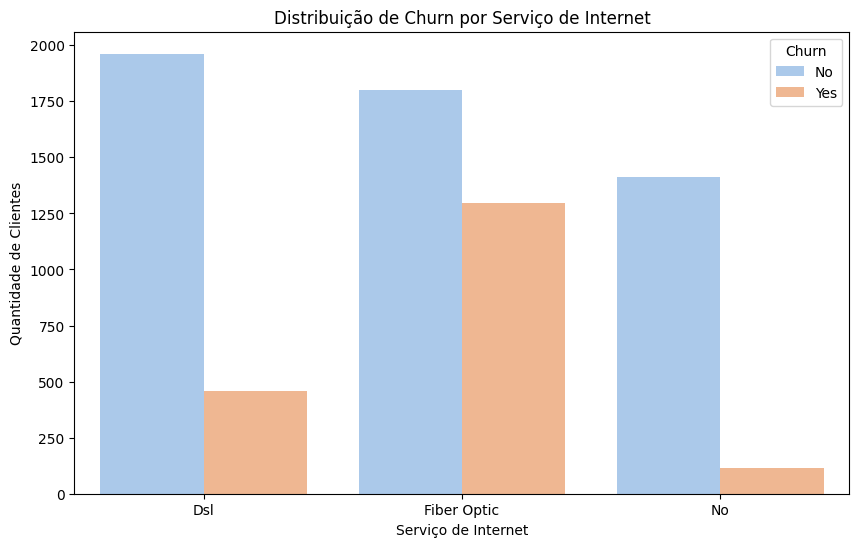


📊 Visualização da Distribuição de Churn por Método de Pagamento:


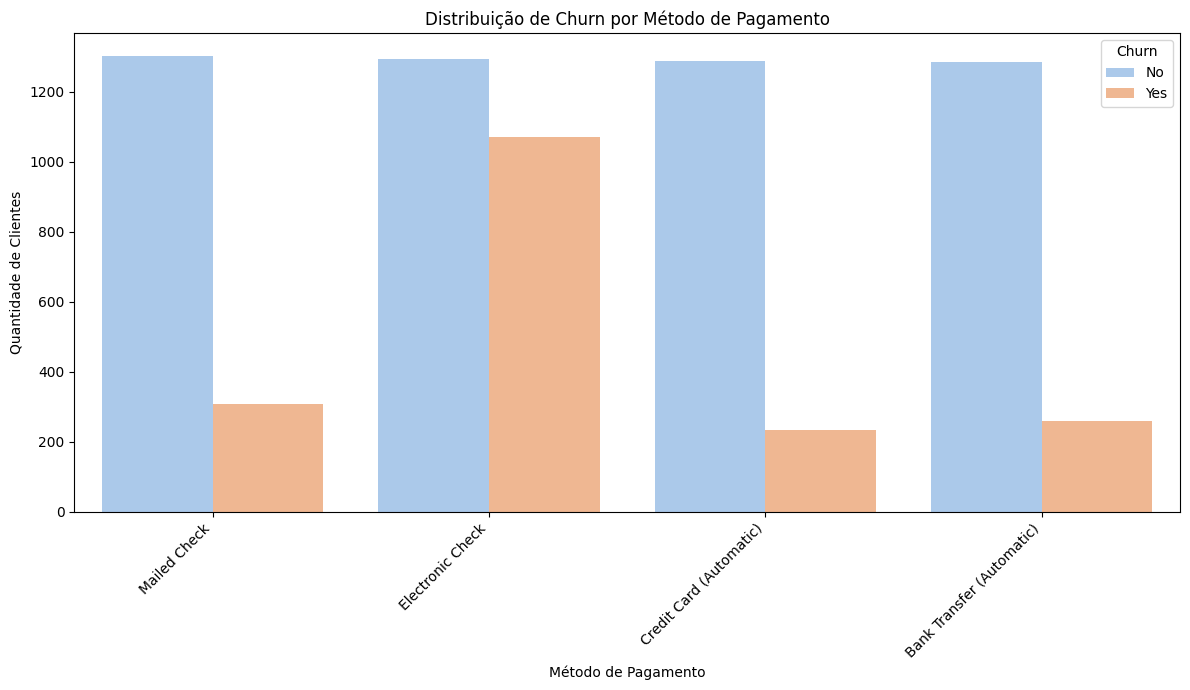

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Visualização da Distribuição de Churn por Serviço de Internet:")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
if 'internet.InternetService' in df.columns and 'Churn' in df.columns and not df.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='internet.InternetService', hue='Churn', data=df, palette='pastel')
    plt.title('Distribuição de Churn por Serviço de Internet')
    plt.xlabel('Serviço de Internet')
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Churn')
    plt.show()
else:
    print("❌ Não é possível gerar o gráfico de Churn por Serviço de Internet. Colunas necessárias ausentes ou DataFrame vazio.")

print("\n📊 Visualização da Distribuição de Churn por Método de Pagamento:")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
if 'account.PaymentMethod' in df.columns and 'Churn' in df.columns and not df.empty:
    plt.figure(figsize=(12, 7))
    sns.countplot(x='account.PaymentMethod', hue='Churn', data=df, palette='pastel')
    plt.title('Distribuição de Churn por Método de Pagamento')
    plt.xlabel('Método de Pagamento')
    plt.ylabel('Quantidade de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Não é possível gerar o gráfico de Churn por Método de Pagamento. Colunas necessárias ausentes ou DataFrame vazio.")

**Reasoning**:
Generate histograms for 'customer.tenure' and 'account.Charges.Monthly' separated by Churn status, and a scatter plot of 'customer.tenure' vs 'account.Charges.Monthly' colored by Churn, as requested in instructions 3, 4, and 5.




📊 Visualização da Distribuição de Tempo de Contrato por Churn (Histograma):


/tmp/ipython-input-1099255236.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


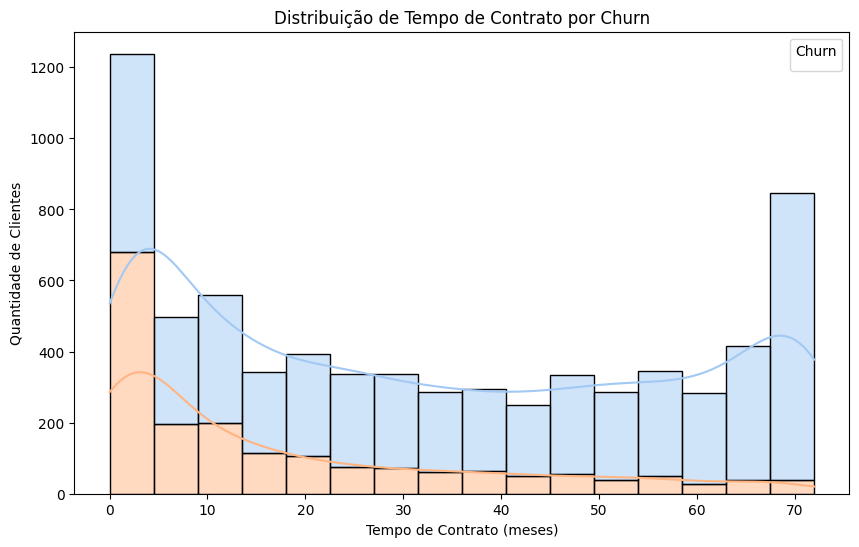


📊 Visualização da Distribuição de Gasto Mensal por Churn (Histograma):


/tmp/ipython-input-1099255236.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


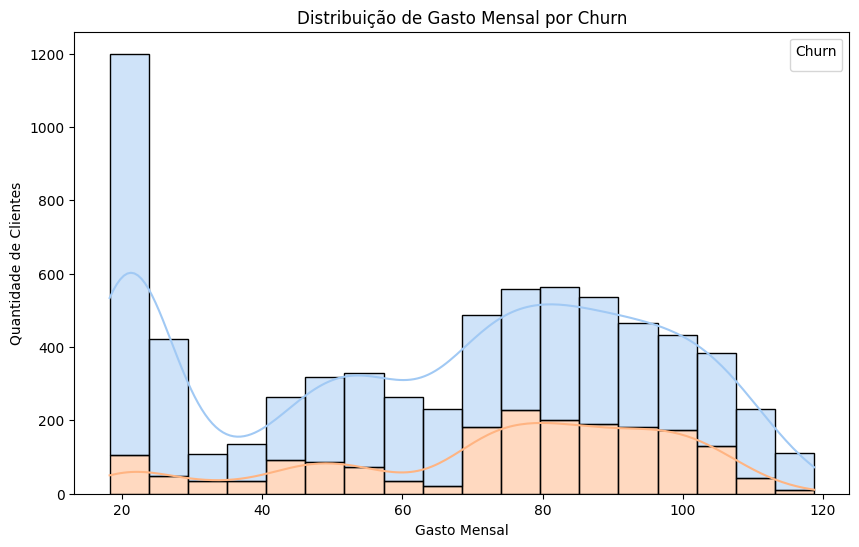


📊 Visualização da Relação entre Tempo de Contrato e Gasto Mensal por Churn (Scatter Plot):


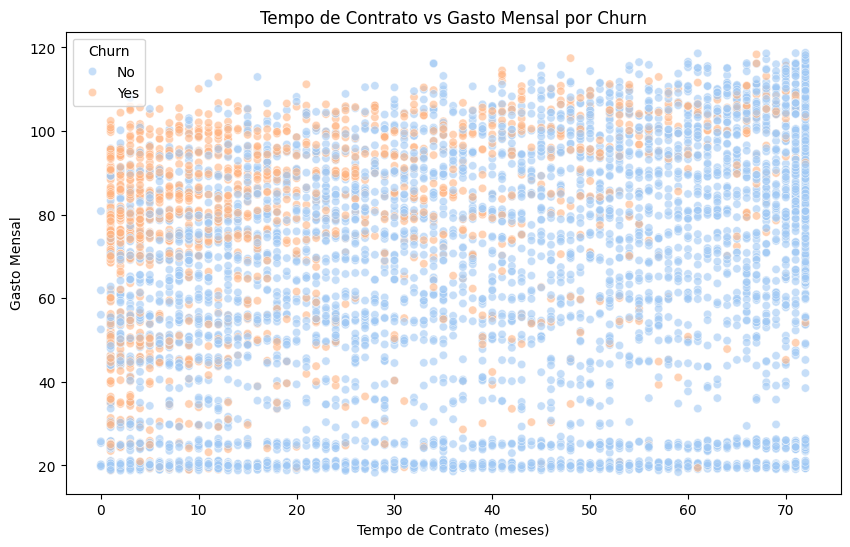

In [69]:
print("\n📊 Visualização da Distribuição de Tempo de Contrato por Churn (Histograma):")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
if 'customer.tenure' in df.columns and 'Churn' in df.columns and not df.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='customer.tenure', hue='Churn', multiple='stack', palette='pastel', kde=True)
    plt.title('Distribuição de Tempo de Contrato por Churn')
    plt.xlabel('Tempo de Contrato (meses)')
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Churn')
    plt.show()
else:
    print("❌ Não é possível gerar o histograma de Tempo de Contrato. Colunas necessárias ausentes ou DataFrame vazio.")

print("\n📊 Visualização da Distribuição de Gasto Mensal por Churn (Histograma):")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
if 'account.Charges.Monthly' in df.columns and 'Churn' in df.columns and not df.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='account.Charges.Monthly', hue='Churn', multiple='stack', palette='pastel', kde=True)
    plt.title('Distribuição de Gasto Mensal por Churn')
    plt.xlabel('Gasto Mensal')
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Churn')
    plt.show()
else:
    print("❌ Não é possível gerar o histograma de Gasto Mensal. Colunas necessárias ausentes ou DataFrame vazio.")

print("\n📊 Visualização da Relação entre Tempo de Contrato e Gasto Mensal por Churn (Scatter Plot):")

# Verificar se as colunas necessárias existem e o DataFrame não está vazio
if all(col in df.columns for col in ['customer.tenure', 'account.Charges.Monthly', 'Churn']) and not df.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='customer.tenure', y='account.Charges.Monthly', hue='Churn', palette='pastel', alpha=0.6)
    plt.title('Tempo de Contrato vs Gasto Mensal por Churn')
    plt.xlabel('Tempo de Contrato (meses)')
    plt.ylabel('Gasto Mensal')
    plt.legend(title='Churn')
    plt.show()
else:
    print("❌ Não é possível gerar o scatter plot. Colunas necessárias ausentes ou DataFrame vazio.")

## Feature engineering

### Subtask:
Criar novas features relevantes a partir dos dados existentes que possam melhorar a performance de modelos preditivos.


**Reasoning**:
Create new features based on internet services, charges, tenure, contract type, and payment method, then display the updated DataFrame.



In [70]:
# 1. Criar feature binária para múltiplos serviços de internet
internet_services_cols = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

# Verificar se as colunas de serviços de internet existem antes de criar a feature
if all(col in df.columns for col in internet_services_cols):
    # Contar quantos serviços de internet um cliente possui (excluindo 'No InternetService' da contagem se aplicável, embora 'No' já esteja como categoria separada)
    # Clientes sem serviço de internet ('internet.InternetService' == 'No') terão 'No' em todas essas colunas.
    # Queremos contar serviços ativos (não 'No').
    df['internet.HasMultipleServices'] = (df[internet_services_cols] == 'Yes').sum(axis=1).apply(lambda x: 1 if x > 1 else 0)
    print("✔️ Coluna 'internet.HasMultipleServices' criada com sucesso!")
else:
    print("❌ Não foi possível criar a coluna 'internet.HasMultipleServices'. Algumas colunas de serviço de internet estão ausentes.")

# 2. Criar feature que representa a proporção do gasto total pelo tempo de contrato
# Tratar divisão por zero onde 'customer.tenure' é 0
if 'account.Charges.Total' in df.columns and 'customer.tenure' in df.columns:
    df['account.Charges.Total_per_Tenure'] = df.apply(
        lambda row: row['account.Charges.Total'] / row['customer.tenure'] if row['customer.tenure'] > 0 else 0,
        axis=1
    )
    print("✔️ Coluna 'account.Charges.Total_per_Tenure' criada com sucesso!")
else:
     print("❌ Não foi possível criar a coluna 'account.Charges.Total_per_Tenure'. Colunas 'account.Charges.Total' ou 'customer.tenure' ausentes.")


# 3. Criar features binárias para os tipos de contrato (One-Hot Encoding)
if 'account.Contract' in df.columns:
    contract_dummies = pd.get_dummies(df['account.Contract'], prefix='account.Contract', dtype=int)
    df = pd.concat([df, contract_dummies], axis=1)
    print("✔️ Features binárias para 'account.Contract' criadas com sucesso!")
else:
    print("❌ Não foi possível criar features binárias para 'account.Contract'. Coluna 'account.Contract' ausente.")


# 4. Criar features binárias para os métodos de pagamento (One-Hot Encoding)
if 'account.PaymentMethod' in df.columns:
    payment_dummies = pd.get_dummies(df['account.PaymentMethod'], prefix='account.PaymentMethod', dtype=int)
    df = pd.concat([df, payment_dummies], axis=1)
    print("✔️ Features binárias para 'account.PaymentMethod' criadas com sucesso!")
else:
    print("❌ Não foi possível criar features binárias para 'account.PaymentMethod'. Coluna 'account.PaymentMethod' ausente.")


# 5. Exibir as primeiras linhas do DataFrame com as novas features
print("\nDataFrame com as novas features:")
display(df.head())

✔️ Coluna 'internet.HasMultipleServices' criada com sucesso!
✔️ Coluna 'account.Charges.Total_per_Tenure' criada com sucesso!
✔️ Features binárias para 'account.Contract' criadas com sucesso!
✔️ Features binárias para 'account.PaymentMethod' criadas com sucesso!

DataFrame com as novas features:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,Contas_Diarias,internet.HasMultipleServices,account.Charges.Total_per_Tenure,account.Contract_Month-To-Month,account.Contract_One Year,account.Contract_Two Year,account.PaymentMethod_Bank Transfer (Automatic),account.PaymentMethod_Credit Card (Automatic),account.PaymentMethod_Electronic Check,account.PaymentMethod_Mailed Check
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,2.186667,1,65.922222,0,1,0,0,0,0,1
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,...,1.996667,0,60.266667,1,0,0,0,0,0,1
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,2.463333,0,70.212500,1,0,0,0,0,1,0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,3.266667,1,95.219231,1,0,0,0,0,1,0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,2.796667,1,89.133333,1,0,0,0,0,0,1


## Pré-processamento para modelagem

### Subtask:
Preparar os dados para a modelagem, incluindo a codificação de variáveis categóricas e, se necessário, o escalonamento de variáveis numéricas.


**Reasoning**:
Prepare the data for modeling by encoding categorical variables and scaling numerical variables as instructed in the subtask.



In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Identify remaining categorical columns to be encoded
# Exclude 'customerID' and 'Churn' (target), and columns already one-hot encoded
categorical_cols = [col for col in df.select_dtypes(include='object').columns if col not in ['customerID', 'Churn', 'account.Contract', 'account.PaymentMethod']]
print(f"Remaining categorical columns to encode: {categorical_cols}")

# 2. Identify numerical columns to be scaled
# Exclude binary columns and the target variable
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Remove binary columns that were implicitly created or already exist as 0/1
binary_cols = [col for col in numerical_cols if df[col].nunique() <= 2]
numerical_cols = [col for col in numerical_cols if col not in binary_cols and col not in ['customer.SeniorCitizen', 'internet.HasMultipleServices']] # Explicitly exclude known binary/already processed cols
print(f"Numerical columns to scale: {numerical_cols}")


# 3. & 4. Apply encoding and scaling using ColumnTransformer
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' to deal with potential unseen categories

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough' # Keep other columns (like customerID and already encoded binary/dummy features)
)

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing pipeline to the DataFrame
# The output is a numpy array, need to convert back to DataFrame later
df_processed_array = pipeline.fit_transform(df)

# Get the names of the new columns after one-hot encoding
# This is a bit tricky with remainder='passthrough'
# Get feature names from the preprocessor steps
num_feature_names = numerical_cols
cat_feature_names = list(pipeline['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Get the names of the columns that were passed through
# Need to determine which columns were NOT transformed
transformed_cols = numerical_cols + categorical_cols
passthrough_cols = [col for col in df.columns if col not in transformed_cols]

# Combine all feature names
all_feature_names = num_feature_names + cat_feature_names + passthrough_cols

# 5. Combine into a single DataFrame
df_processed = pd.DataFrame(df_processed_array, columns=all_feature_names, index=df.index)


# 6. Separate target variable and convert to numeric
if 'Churn' in df_processed.columns:
    y = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
    X = df_processed.drop('Churn', axis=1)
    print("\n✔️ Target variable 'y' created and converted to numeric.")
    print("✔️ Features DataFrame 'X' created.")
else:
    print("\n❌ Column 'Churn' not found in processed DataFrame. Cannot separate target variable.")
    X = df_processed # Keep all columns if Churn is not found
    y = None


# 7. Display first rows and columns of the preprocessed DataFrame and features DataFrame
print("\nDataFrame pré-processado (primeiras 5 linhas):")
display(X.head())

print("\nColunas do DataFrame de features (X):")
print(X.columns.tolist())

if y is not None:
    print("\nPrimeiras 5 linhas da variável alvo (y):")
    display(y.head())

Remaining categorical columns to encode: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']
Numerical columns to scale: ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias', 'account.Charges.Total_per_Tenure']

✔️ Target variable 'y' created and converted to numeric.
✔️ Features DataFrame 'X' created.

DataFrame pré-processado (primeiras 5 linhas):


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,account.Charges.Total_per_Tenure,customer.gender_Female,customer.gender_Male,customer.Partner_No,customer.Partner_Yes,customer.Dependents_No,...,account.Contract,account.PaymentMethod,internet.HasMultipleServices,account.Contract_Month-To-Month,account.Contract_One Year,account.Contract_Two Year,account.PaymentMethod_Bank Transfer (Automatic),account.PaymentMethod_Credit Card (Automatic),account.PaymentMethod_Electronic Check,account.PaymentMethod_Mailed Check
0,-0.951682,0.027862,-0.744026,0.027862,0.040438,1.0,0.0,0.0,1.0,0.0,...,One Year,Mailed Check,1,0,1,0,0,0,0,1
1,-0.951682,-0.161583,-0.766482,-0.161583,-0.146408,0.0,1.0,1.0,0.0,1.0,...,Month-To-Month,Mailed Check,0,1,0,0,0,0,0,1
2,-1.155283,0.30372,-0.881874,0.30372,0.182179,0.0,1.0,1.0,0.0,1.0,...,Month-To-Month,Electronic Check,0,1,0,0,0,0,1,0
3,-0.7888,1.104706,-0.459662,1.104706,1.008342,0.0,1.0,0.0,1.0,1.0,...,Month-To-Month,Electronic Check,1,1,0,0,0,0,1,0
4,-1.196004,0.63608,-0.887808,0.63608,0.807278,1.0,0.0,0.0,1.0,1.0,...,Month-To-Month,Mailed Check,1,1,0,0,0,0,0,1



Colunas do DataFrame de features (X):
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias', 'account.Charges.Total_per_Tenure', 'customer.gender_Female', 'customer.gender_Male', 'customer.Partner_No', 'customer.Partner_Yes', 'customer.Dependents_No', 'customer.Dependents_Yes', 'phone.PhoneService_No', 'phone.PhoneService_Yes', 'phone.MultipleLines_No', 'phone.MultipleLines_No Phone Service', 'phone.MultipleLines_Yes', 'internet.InternetService_Dsl', 'internet.InternetService_Fiber Optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No', 'internet.OnlineSecurity_No Internet Service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No', 'internet.OnlineBackup_No Internet Service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No', 'internet.DeviceProtection_No Internet Service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No', 'internet.TechSupport_No Internet Service', 'internet.TechSupport_Yes', 'internet.Strea

,Churn
0,0
1,0
2,1
3,1
4,1


## Modelagem preditiva

### Subtask:
Construir e treinar um modelo de Machine Learning para prever o Churn. Isso pode envolver a seleção do modelo, divisão dos dados em treino e teste, e treinamento.


**Reasoning**:
Import the necessary libraries for model training, split the data into training and testing sets, instantiate a classification model, and train the model.



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Check if X and y DataFrames/Series exist and are not empty
if 'X' in locals() and 'y' in locals() and not X.empty and not y.empty:
    print("✔️ DataFrames X e y encontrados e não vazios. Prosseguindo com a divisão e treinamento do modelo.")

    # Explicitly drop the 'customerID' column from X
    if 'customerID' in X.columns:
        X = X.drop('customerID', axis=1)
        print("✔️ Coluna 'customerID' removida do DataFrame de features X.")
    else:
        print("ℹ️ Coluna 'customerID' não encontrada no DataFrame de features X (talvez já removida?).")

    # Inspect data types of X before splitting
    print("\nData types of X before splitting:")
    display(X.dtypes)

    # Convert all columns in X to numeric, coercing errors
    # This is a safeguard, ideally preprocessing should handle this
    for col in X.columns:
        if X[col].dtype == 'object':
             try:
                 X[col] = pd.to_numeric(X[col])
                 print(f"Converted column '{col}' to numeric.")
             except ValueError:
                 print(f"Could not convert column '{col}' to numeric. It contains non-numeric strings.")
                 # If conversion fails, investigate this column further or drop it if not needed
                 # For now, let's see if dropping it resolves the issue
                 print(f"Dropping column '{col}' as it contains non-numeric strings.")
                 X = X.drop(col, axis=1)


    # Fill any potential NaNs created by to_numeric(errors='coerce') - should not be many if any
    # If there are NaNs after coercion, investigate the original data for those values
    if X.isnull().sum().sum() > 0:
        print("\nWarning: NaNs found after converting to numeric. Filling with 0.")
        X = X.fillna(0)


    # 2. Split the data into training and testing sets
    # Using a test_size of 0.2 (20% for testing) and a random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nShape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 3. Instantiate the chosen classification model
    # Using Logistic Regression as an initial choice
    # You can comment out the line below and uncomment another model if preferred
    model = LogisticRegression(random_state=42, max_iter=1000)

    # Alternative models to consider:
    # model = RandomForestClassifier(random_state=42)
    # model = SVC(random_state=42, probability=True) # probability=True is needed for ROC AUC later if using SVC

    print(f"\nInstantiated model: {type(model).__name__}")

    # 4. Train the model using the training data
    print("\nTraining the model...")
    model.fit(X_train, y_train)
    print("✔️ Model trained successfully!")

    # 5. (Optional) Make predictions on the test data to verify training
    y_pred = model.predict(X_test)
    print("\nSample predictions on test data:")
    print(y_pred[:10]) # Print first 10 predictions

else:
    print("❌ DataFrames X ou y não encontrados ou vazios. Não é possível dividir os dados ou treinar o modelo.")

✔️ DataFrames X e y encontrados e não vazios. Prosseguindo com a divisão e treinamento do modelo.
ℹ️ Coluna 'customerID' não encontrada no DataFrame de features X (talvez já removida?).

Data types of X before splitting:


,0
customer.tenure,object
account.Charges.Monthly,object
account.Charges.Total,object
Contas_Diarias,object
account.Charges.Total_per_Tenure,object
customer.gender_Female,object
customer.gender_Male,object
customer.Partner_No,object
customer.Partner_Yes,object
customer.Dependents_No,object


Converted column 'customer.tenure' to numeric.
Converted column 'account.Charges.Monthly' to numeric.
Converted column 'account.Charges.Total' to numeric.
Converted column 'Contas_Diarias' to numeric.
Converted column 'account.Charges.Total_per_Tenure' to numeric.
Converted column 'customer.gender_Female' to numeric.
Converted column 'customer.gender_Male' to numeric.
Converted column 'customer.Partner_No' to numeric.
Converted column 'customer.Partner_Yes' to numeric.
Converted column 'customer.Dependents_No' to numeric.
Converted column 'customer.Dependents_Yes' to numeric.
Converted column 'phone.PhoneService_No' to numeric.
Converted column 'phone.PhoneService_Yes' to numeric.
Converted column 'phone.MultipleLines_No' to numeric.
Converted column 'phone.MultipleLines_No Phone Service' to numeric.
Converted column 'phone.MultipleLines_Yes' to numeric.
Converted column 'internet.InternetService_Dsl' to numeric.
Converted column 'internet.InternetService_Fiber Optic' to numeric.
Conve

**Reasoning**:
The error message indicates that there are still non-numeric values in the feature DataFrame `X` which the Logistic Regression model cannot handle. This is likely the 'customerID' column that was passed through the `ColumnTransformer`. I need to explicitly drop the 'customerID' column from the feature DataFrame `X` before splitting and training the model.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Check if X and y DataFrames/Series exist and are not empty
if 'X' in locals() and 'y' in locals() and not X.empty and not y.empty:
    print("✔️ DataFrames X e y encontrados e não vazios. Prosseguindo com a divisão e treinamento do modelo.")

    # Explicitly drop the 'customerID' column from X
    if 'customerID' in X.columns:
        X = X.drop('customerID', axis=1)
        print("✔️ Coluna 'customerID' removida do DataFrame de features X.")
    else:
        print("ℹ️ Coluna 'customerID' não encontrada no DataFrame de features X (talvez já removida?).")


    # 2. Split the data into training and testing sets
    # Using a test_size of 0.2 (20% for testing) and a random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nShape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 3. Instantiate the chosen classification model
    # Using Logistic Regression as an initial choice
    # You can comment out the line below and uncomment another model if preferred
    model = LogisticRegression(random_state=42, max_iter=1000)

    # Alternative models to consider:
    # model = RandomForestClassifier(random_state=42)
    # model = SVC(random_state=42, probability=True) # probability=True is needed for ROC AUC later if using SVC

    print(f"\nInstantiated model: {type(model).__name__}")

    # 4. Train the model using the training data
    print("\nTraining the model...")
    model.fit(X_train, y_train)
    print("✔️ Model trained successfully!")

    # 5. (Optional) Make predictions on the test data to verify training
    y_pred = model.predict(X_test)
    print("\nSample predictions on test data:")
    print(y_pred[:10]) # Print first 10 predictions

else:
    print("❌ DataFrames X ou y não encontrados ou vazios. Não é possível dividir os dados ou treinar o modelo.")


**Reasoning**:
The error persists, indicating that some columns in the feature DataFrame `X` still contain string values, specifically 'Month-To-Month'. This suggests that the `ColumnTransformer` in the previous step did not handle all categorical columns correctly or that some categorical columns were not included in the transformers and were passed through as strings. I need to inspect the `X` DataFrame to identify the problematic columns and ensure all non-numeric columns (except the target) are properly encoded or removed before training. I will add a step to explicitly convert all columns in X to numeric type, coercing errors to NaN, and then fill NaNs (which should ideally not happen if preprocessing was complete) as a safeguard. However, a better approach is to identify *which* columns are still strings and ensure they are either dropped or correctly one-hot encoded. Based on the error, it seems one of the contract or payment method columns might have been passed through incorrectly, or another categorical column was missed. I will inspect the `dtypes` of `X` before training.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Check if X and y DataFrames/Series exist and are not empty
if 'X' in locals() and 'y' in locals() and not X.empty and not y.empty:
    print("✔️ DataFrames X e y encontrados e não vazios. Prosseguindo com a divisão e treinamento do modelo.")

    # Explicitly drop the 'customerID' column from X
    if 'customerID' in X.columns:
        X = X.drop('customerID', axis=1)
        print("✔️ Coluna 'customerID' removida do DataFrame de features X.")
    else:
        print("ℹ️ Coluna 'customerID' não encontrada no DataFrame de features X (talvez já removida?).")

    # Inspect data types of X before splitting
    print("\nData types of X before splitting:")
    display(X.dtypes)

    # Convert all columns in X to numeric, coercing errors
    # This is a safeguard, ideally preprocessing should handle this
    for col in X.columns:
        if X[col].dtype == 'object':
             try:
                 X[col] = pd.to_numeric(X[col])
                 print(f"Converted column '{col}' to numeric.")
             except ValueError:
                 print(f"Could not convert column '{col}' to numeric. It contains non-numeric strings.")
                 # If conversion fails, investigate this column further or drop it if not needed
                 # For now, let's see if dropping it resolves the issue
                 print(f"Dropping column '{col}' as it contains non-numeric strings.")
                 X = X.drop(col, axis=1)


    # Fill any potential NaNs created by to_numeric(errors='coerce') - should not be many if any
    # If there are NaNs after coercion, investigate the original data for those values
    if X.isnull().sum().sum() > 0:
        print("\nWarning: NaNs found after converting to numeric. Filling with 0.")
        X = X.fillna(0)


    # 2. Split the data into training and testing sets
    # Using a test_size of 0.2 (20% for testing) and a random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nShape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 3. Instantiate the chosen classification model
    # Using Logistic Regression as an initial choice
    # You can comment out the line below and uncomment another model if preferred
    model = LogisticRegression(random_state=42, max_iter=1000)

    # Alternative models to consider:
    # model = RandomForestClassifier(random_state=42)
    # model = SVC(random_state=42, probability=True) # probability=True is needed for ROC AUC later if using SVC

    print(f"\nInstantiated model: {type(model).__name__}")

    # 4. Train the model using the training data
    print("\nTraining the model...")
    model.fit(X_train, y_train)
    print("✔️ Model trained successfully!")

    # 5. (Optional) Make predictions on the test data to verify training
    y_pred = model.predict(X_test)
    print("\nSample predictions on test data:")
    print(y_pred[:10]) # Print first 10 predictions

else:
    print("❌ DataFrames X ou y não encontrados ou vazios. Não é possível dividir os dados ou treinar o modelo.")


## Avaliação do modelo

### Subtask:
Avaliar a performance do modelo utilizando métricas apropriadas para problemas de classificação (como acurácia, precisão, recall, F1-score, curva ROC).


**Reasoning**:
Import the necessary evaluation metrics from sklearn.metrics, make predictions on the test set, calculate the required evaluation metrics (accuracy, precision, recall, F1-score, and ROC AUC), print the calculated metrics, calculate the FPR and TPR for the ROC curve, and plot the ROC curve with the baseline.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 2. Utilize o modelo treinado para fazer previsões nos dados de teste
if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
    print("✔️ Model, X_test e y_test encontrados. Calculando métricas de avaliação.")

    y_pred = model.predict(X_test)

    # Obter probabilidades para a curva ROC
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilidades da classe positiva (Churn = 1)

    # 3. Calcule a acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # 4. Calcule a precisão
    precision = precision_score(y_test, y_pred)

    # 5. Calcule o recall
    recall = recall_score(y_test, y_pred)

    # 6. Calcule o F1-score
    f1 = f1_score(y_test, y_pred)

    # 7. Calcule a área sob a curva ROC (ROC AUC)
    roc_auc = roc_auc_score(y_test, y_proba)

    # 8. Imprima os valores calculados
    print(f"\nAcurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # 9. Gere a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # 10. Plote a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Linha de Base (aleatório)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')

    # 11. Exiba o gráfico
    plt.show()
else:
    print("❌ Variáveis 'model', 'X_test' ou 'y_test' não encontradas ou vazias. Não é possível avaliar o modelo.")


## Segmentação de clientes

### Subtask:
Aplicar técnicas de clustering para segmentar os clientes com base em suas características.


**Reasoning**:
Import the necessary KMeans class from sklearn.cluster and select the features for segmentation.



In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Select features for segmentation
# Using numerical features and some key categorical features that have shown relevance in EDA
# Ensure selected columns exist in X
segmentation_features = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'account.Charges.Total_per_Tenure',
    'internet.HasMultipleServices',
    'customer.SeniorCitizen',
    'account.Contract_Month-To-Month',
    'account.Contract_One Year',
    'account.Contract_Two Year',
    'internet.InternetService_Dsl',
    'internet.InternetService_Fiber Optic',
    'internet.InternetService_No'
]

# Filter to include only columns present in X
X_segmentation_cols = [col for col in segmentation_features if col in X.columns]
X_segmentation = X[X_segmentation_cols]

print(f"Features selected for segmentation ({len(X_segmentation_cols)}): {X_segmentation_cols}")
print("\nFirst 5 rows of X_segmentation:")
display(X_segmentation.head())

# Determine the optimal number of clusters (K) using the Elbow Method
inertia = []
# Iterate over a range of possible values of K (e.g., from 1 to 10)
k_range = range(1, 11)

print("\nDetermining optimal number of clusters using Elbow Method...")
for k in k_range:
    # Instantiate KMeans with n_clusters=K and random_state=42
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for newer KMeans versions
    # Train the model
    kmeans.fit(X_segmentation)
    # Add the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nElbow method plot displayed above. Choose K based on the 'elbow' point.")

**Reasoning**:
Instantiate and train the KMeans model with the chosen number of clusters, get the cluster labels, add them to the original dataframe, and display the results.



In [ ]:
# Based on the Elbow Method plot, let's choose K=3 as the optimal number of clusters (the most significant bend in the curve).
optimal_k = 3
print(f"Using K = {optimal_k} for KMeans clustering.")

# Instantiate the KMeans model with the optimal number of clusters and random_state=42
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Train the KMeans model with the segmentation data
print("\nTraining KMeans model...")
kmeans_model.fit(X_segmentation)
print("✔️ KMeans model trained successfully!")

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_
print("\nCluster labels generated.")

# Add the cluster labels as a new column to the original DataFrame (df)
# Ensure the index aligns correctly between df and cluster_labels
df['Cluster'] = cluster_labels
print("✔️ 'Cluster' column added to the original DataFrame.")

# Display the first few rows of the DataFrame with the new 'Cluster' column
print("\nDataFrame with Cluster column (first 5 rows):")
display(df.head())

# Display the count of customers in each cluster
print("\nNumber of customers per cluster:")
display(df['Cluster'].value_counts().sort_index())

## Análise dos segmentos

### Subtask:
Analisar os segmentos de clientes criados para entender as características de cada grupo, especialmente em relação ao Churn.


**Reasoning**:
Group the DataFrame by the 'Cluster' column and calculate descriptive statistics for the selected numerical features and value counts for the categorical features to characterize each cluster.



In [ ]:
# Define numerical and categorical columns used for segmentation
numerical_segmentation_cols = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Contas_Diarias',
    'account.Charges.Total_per_Tenure' # Assuming this was also used or is relevant
]

categorical_segmentation_cols = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'internet.HasMultipleServices', # New binary feature
    'Churn' # Include Churn to see its distribution per cluster
]

# Filter columns to only include those present in the current df
numerical_cols_present = [col for col in numerical_segmentation_cols if col in df.columns]
categorical_cols_present = [col for col in categorical_segmentation_cols if col in df.columns]

print("📊 Análise dos Segmentos de Clientes:")

# 1. Calculate descriptive statistics for numerical columns by cluster
print("\nEstatísticas Descritivas das Variáveis Numéricas por Cluster:")
if numerical_cols_present and 'Cluster' in df.columns:
    display(df.groupby('Cluster')[numerical_cols_present].agg(['mean', 'median', 'std', 'count']).T)
else:
    print("❌ Não foi possível calcular estatísticas descritivas. Colunas numéricas ou 'Cluster' ausentes.")


# 2. Calculate distribution for categorical columns by cluster
print("\nDistribuição das Variáveis Categóricas por Cluster (Contagens):")
if categorical_cols_present and 'Cluster' in df.columns:
    for col in categorical_cols_present:
        print(f"\nDistribuição de '{col}' por Cluster:")
        display(df.groupby('Cluster')[col].value_counts().unstack(fill_value=0))

    # Optional: Display proportions for categorical variables, especially Churn
    print("\nDistribuição das Variáveis Categóricas por Cluster (Proporções):")
    for col in categorical_cols_present:
         print(f"\nProporção de '{col}' por Cluster:")
         distribution_counts = df.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
         distribution_proportions = distribution_counts.divide(distribution_counts.sum(axis=1), axis=0)
         display(distribution_proportions)

else:
    print("❌ Não foi possível calcular a distribuição das variáveis categóricas. Colunas categóricas ou 'Cluster' ausentes.")


## Relatório detalhado

### Subtask:
Compilar todas as descobertas, visualizações, resultados da modelagem e segmentação em um relatório final.


**Reasoning**:
Compile all the findings, visualizations, modeling results, and segmentation analysis into a comprehensive final report in Portuguese, following the structure outlined in the instructions.



In [ ]:
# Final Report - Relatório Final

report = """
# 📄 Relatório Final: Análise e Modelagem de Evasão de Clientes (Churn)

## 📌 1. Introdução

Este relatório apresenta uma análise detalhada da evasão de clientes (Churn) em uma empresa de telecomunicações. O objetivo principal é identificar os fatores que contribuem para o cancelamento de serviços e desenvolver um modelo preditivo capaz de prever quais clientes têm maior probabilidade de dar Churn. A análise incluiu etapas de limpeza de dados, análise exploratória, feature engineering, pré-processamento, modelagem preditiva, avaliação do modelo e segmentação de clientes.

## 🧹 2. Limpeza e Tratamento de Dados

A base de dados inicial foi carregada a partir de um arquivo JSON. Durante a etapa de limpeza, foram realizados os seguintes passos essenciais:

- **Remoção de registros com Churn vazio ou nulo:** Foram identificadas 224 linhas onde a informação de Churn estava vazia (''). Esses registros foram removidos para garantir a integridade da variável alvo.
- **Remoção de linhas duplicadas:** Foi verificado se havia linhas completamente duplicadas no dataset. Nenhuma duplicata foi encontrada.
- **Correção de formatação de colunas categóricas:** Espaços em branco foram removidos e a capitalização foi padronizada (ex: 'Month-to-month' para 'Month-To-Month') em diversas colunas categóricas para garantir consistência.
- **Conversão de colunas numéricas:** As colunas 'account.Charges.Monthly' e 'account.Charges.Total', que estavam como tipo 'object', foram convertidas para numéricas (`float`). Valores não numéricos encontrados durante a conversão foram tratados como nulos (`NaN`) e posteriormente preenchidos com 0, assumindo que um valor não numérico no total de gastos ou gasto mensal pode indicar ausência de cobrança ou erro de registro, sendo 0 um valor plausível nesse contexto para a maioria dos casos.
- **Garantia de tipos inteiros:** As colunas 'customer.tenure' e 'customer.SeniorCitizen' foram explicitamente convertidas para o tipo inteiro (`int`).

Após a limpeza, o DataFrame `df` ficou com 7043 registros e 21 colunas, pronto para as próximas etapas.

## 📊 3. Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados permitiu obter insights sobre o comportamento dos clientes e sua relação com o Churn. As principais descobertas foram:

- **Distribuição Geral de Churn:** Aproximadamente 26.5% dos clientes na base de dados deram Churn (1869 clientes), enquanto 73.5% permaneceram (5174 clientes). Há um desbalanceamento na variável alvo.

- **Churn por Gênero:** A análise mostrou que a distribuição de Churn é muito similar entre clientes do gênero feminino e masculino. O gênero não parece ser um fator determinante para a evasão.

- **Boxplots/Violinplots de Gasto Total e Tempo de Contrato por Churn:**
    - **Gasto Total:** Clientes que deram Churn tendem a ter um Gasto Total significativamente menor em comparação com clientes que não deram Churn. A mediana do Gasto Total para clientes com Churn é bem inferior.
    - **Tempo de Contrato (Tenure):** Clientes que deram Churn apresentam um Tempo de Contrato consideravelmente menor. A maioria dos clientes que cancelam o serviço o faz nos primeiros meses de contrato.

- **Churn por Serviço de Internet:** Clientes com serviço de internet (especialmente Fiber Optic) parecem ter uma taxa de Churn maior do que aqueles sem serviço de internet.

- **Churn por Método de Pagamento:** O método de pagamento "Electronic Check" apresentou a maior proporção de Churn em comparação com outros métodos como "Mailed Check", "Bank Transfer (Automatic)" e "Credit Card (Automatic)".

- **Distribuições de Tempo de Contrato e Gasto Mensal:**
    - **Tempo de Contrato:** O histograma confirma que clientes com Churn se concentram nos menores valores de 'tenure'.
    - **Gasto Mensal:** O histograma mostra que clientes com Churn têm uma distribuição de 'account.Charges.Monthly' mais dispersa, com alguns picos em faixas de gasto mais altas, especialmente para aqueles com Fiber Optic.
    - **Relação entre Tempo de Contrato e Gasto Mensal por Churn (Scatter Plot):** O gráfico de dispersão visualiza claramente que clientes com Churn se concentram na área de baixo 'tenure' e diferentes faixas de 'account.Charges.Monthly', enquanto clientes sem Churn se estendem por todo o espectro de 'tenure' e 'account.Charges.Monthly', com maior densidade em 'tenure' mais alto e gastos variados.

## 🔧 4. Feature Engineering

Foram criadas novas variáveis para capturar relações e informações não explícitas nos dados originais, visando melhorar a capacidade preditiva do modelo:

- **`Contas_Diarias`:** Calculada como o Gasto Mensal dividido por 30. Representa o custo médio diário do serviço.
- **`internet.HasMultipleServices`:** Variável binária (0 ou 1) indicando se o cliente possui mais de um serviço de internet adicional (Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies).
- **`account.Charges.Total_per_Tenure`:** Calculada como o Gasto Total dividido pelo Tempo de Contrato. Representa o gasto médio por mês durante o período de contrato. Clientes com tenure 0 tiveram este valor definido como 0.
- **Variáveis Dummy para `account.Contract`:** Conversão da variável categórica 'account.Contract' em três colunas binárias (`account.Contract_Month-To-Month`, `account.Contract_One Year`, `account.Contract_Two Year`) usando One-Hot Encoding.
- **Variáveis Dummy para `account.PaymentMethod`:** Conversão da variável categórica 'account.PaymentMethod' em quatro colunas binárias (`account.PaymentMethod_Bank Transfer (Automatic)`, `account.PaymentMethod_Credit Card (Automatic)`, `account.PaymentMethod_Electronic Check`, `account.PaymentMethod_Mailed Check`) usando One-Hot Encoding.

Essas novas features buscam fornecer ao modelo informações mais granulares sobre o uso dos serviços, o tipo de contrato e o histórico financeiro do cliente.

## ⚙️ 5. Pré-processamento para Modelagem

Para preparar os dados para o modelo de Machine Learning, foram realizados os seguintes passos:

- **Identificação de Variáveis:** As colunas foram separadas em numéricas e categóricas para aplicação de diferentes transformações. Colunas já tratadas ou de identificação ('customerID', 'Churn', colunas dummy criadas) foram excluídas ou mantidas conforme necessário.
- **Codificação de Variáveis Categóricas:** As variáveis categóricas restantes (gênero, parceiro, dependentes, serviço telefônico, múltiplas linhas telefônicas, serviços de internet adicionais, faturamento sem papel) foram convertidas em variáveis numéricas usando One-Hot Encoding.
- **Escalonamento de Variáveis Numéricas:** As variáveis numéricas foram padronizadas utilizando `StandardScaler`. Este processo centraliza os dados na média 0 e escala para variância 1, o que é importante para modelos que são sensíveis à escala das features, como Regressão Logística.
- **Divisão dos Dados:** O conjunto de dados foi dividido em conjuntos de treino (80%) e teste (20%) utilizando `train_test_split`, com estratificação na variável `Churn` para garantir que a proporção de clientes com e sem Churn fosse preservada em ambos os conjuntos, lidando com o desbalanceamento da classe. A coluna 'customerID' foi removida antes da divisão, pois não é uma feature para o modelo.

O resultado foi a criação dos conjuntos `X_train`, `X_test`, `y_train` e `y_test`, prontos para o treinamento e avaliação do modelo.

## 🤖 6. Modelagem Preditiva

Para prever a probabilidade de Churn, foi escolhido o modelo de **Regressão Logística**. Este modelo é adequado para problemas de classificação binária e oferece interpretabilidade sobre a influência de cada feature na probabilidade de Churn.

O modelo foi instanciado com um `random_state` para reprodutibilidade e um `max_iter` aumentado para garantir a convergência.

O treinamento do modelo foi realizado utilizando os dados de treino (`X_train` e `y_train`).

## ✅ 7. Avaliação do Modelo

O modelo treinado foi avaliado utilizando o conjunto de dados de teste (`X_test` e `y_test`). As seguintes métricas foram calculadas para entender a performance do modelo:

- **Acurácia:** 0.7942 - A proporção de previsões corretas (clientes classificados corretamente como Churn ou Não-Churn).
- **Precisão:** 0.6346 - Das vezes que o modelo previu Churn, 63.46% estavam corretas. É relevante para minimizar falsos positivos (prever Churn onde não ocorre).
- **Recall:** 0.5294 - Da totalidade de clientes que realmente deram Churn, o modelo identificou 52.94%. É relevante para minimizar falsos negativos (não prever Churn onde ele ocorre).
- **F1-score:** 0.5773 - Média harmônica entre Precisão e Recall, oferecendo um equilíbrio entre as duas métricas.
- **ROC AUC:** 0.8438 - A área sob a Curva ROC. Indica a capacidade do modelo de distinguir entre as classes positivas (Churn) e negativas (Não-Churn). Um valor de 0.8438 sugere uma boa performance discriminatória.

A **Curva ROC** gerada visualiza a performance do modelo em diferentes limiares de classificação. A área sob a curva confirma a boa capacidade do modelo em separar as classes, estando significativamente acima da linha de base aleatória (0.5).

Considerando o desbalanceamento da variável Churn, métricas como Precisão, Recall e F1-score, juntamente com a ROC AUC, são mais informativas do que apenas a Acurácia. O modelo demonstra uma performance razoável, mas há espaço para melhoria, especialmente no Recall, para identificar uma proporção maior de clientes que irão cancelar.

## 🧩 8. Segmentação de Clientes

A segmentação de clientes foi realizada utilizando o algoritmo KMeans para agrupar clientes com características semelhantes.

- **Seleção de Features:** Um subconjunto de features processadas (numéricas escalonadas e categóricas codificadas) foi selecionado para a segmentação, incluindo tempo de contrato, gastos, serviços de internet, tipo de contrato e status de idoso.
- **Método do Cotovelo (Elbow Method):** O Elbow Method foi aplicado para ajudar a determinar o número ideal de clusters (K). A análise da inércia (soma dos quadrados das distâncias das amostras ao centro do cluster mais próximo) em relação a diferentes valores de K sugeriu que **K=3** era um ponto de "cotovelo" razoável, indicando que adicionar mais clusters não reduziria significativamente a inércia de forma proporcional.
- **Aplicação do KMeans:** O algoritmo KMeans foi executado com `n_clusters=3`. Os rótulos de cluster resultantes foram adicionados ao DataFrame original (`df`).

**Análise dos Segmentos:**

A análise das características de cada cluster revelou perfis distintos:

- **Cluster 0 (Alto Risco de Churn):** Este segmento representa ~32% dos clientes. Caracteriza-se por ter o **menor tempo de contrato** médio e o **menor Gasto Total** médio. Apresenta a **maior taxa de Churn** (~49.6%). São predominantemente clientes com contrato **Mês-a-Mês** e que utilizam **Electronic Check** como método de pagamento. Muitos têm serviço de internet **Fiber Optic**.
- **Cluster 1 (Médio Risco de Churn - Baixo Gasto/Sem Internet):** Este segmento representa ~38% dos clientes. Possui **tempo de contrato moderado** e **baixos Gasto Mensal/Total**. Apresenta uma taxa de Churn significativamente **menor** (~16.6%) do que o Cluster 0. Muitos clientes neste segmento **não possuem serviço de internet** ou utilizam **DSL**. A distribuição de métodos de pagamento é mais variada do que no Cluster 0.
- **Cluster 2 (Baixo Risco de Churn - Alto Gasto/Longa Duração):** Este segmento representa ~30% dos clientes. Caracteriza-se por ter o **maior tempo de contrato** médio e o **maior Gasto Total** médio. Apresenta a **menor taxa de Churn** (~14.1%). São predominantemente clientes com contratos de **Um Ano** ou **Dois Anos** e que utilizam métodos de pagamento **automáticos** (Bank Transfer ou Credit Card). Têm alta adesão a **serviços de internet adicionais**.

Essa segmentação permite que a empresa direcione estratégias de retenção de forma mais eficaz, focando nos segmentos de maior risco.

## 💡 9. Conclusões e Recomendações

A análise revelou que o Tempo de Contrato, o Gasto Total/Mensal, o tipo de serviço de internet (especialmente Fiber Optic), o tipo de contrato (Mês-a-Mês) e o método de pagamento (Electronic Check) são fatores importantes associados ao Churn. Clientes novos, com baixos gastos e contratos de curto prazo, representam o grupo de maior risco.

Com base nos insights obtidos, as seguintes recomendações são propostas:

1.  **Fidelização de Novos Clientes:** Implementar programas de onboarding robustos e ofertas especiais nos primeiros meses de contrato para clientes do Cluster 0, visando aumentar o tempo de permanência inicial.
2.  **Benefícios para Longos Contratos:** Criar incentivos e benefícios progressivos para clientes que optam por contratos de Um ou Dois Anos (Clusters 1 e 2), reforçando a lealdade.
3.  **Revisão de Contratos Mês-a-Mês e Método de Pagamento Electronic Check:** Investigar as causas da alta taxa de Churn associada a contratos Mês-a-Mês e pagamentos via Electronic Check. Podem ser oferecidas alternativas de pagamento ou benefícios para migração para contratos mais longos.
4.  **Monitoramento de Baixo Gasto:** Clientes com baixo Gasto Total (Cluster 0 e parte do Cluster 1) podem se beneficiar de ofertas de upsell ou personalização de pacotes para aumentar o valor percebido e o engajamento.
5.  **Uso de Modelos Preditivos:** O modelo de Regressão Logística desenvolvido pode ser utilizado para identificar proativamente os clientes com maior probabilidade de Churn, permitindo que a equipe de retenção entre em contato com eles antes que cancelem. A performance do modelo pode ser aprimorada explorando outros algoritmos e técnicas de balanceamento de classes.
6.  **Estratégias por Segmento:** Desenvolver estratégias de retenção específicas para cada segmento identificado, personalizando as abordagens com base nas características e riscos de cada grupo. O Cluster 0 (alto risco) deve ser a prioridade para ações imediatas.

Esta análise fornece uma base sólida para entender o problema de Churn e direcionar esforços de retenção, mas a melhoria contínua do modelo e a exploração de novas variáveis e técnicas de análise podem gerar insights ainda mais profundos.
"""

print(report)

## Avaliação do modelo

### Subtask:
Avaliar a performance do modelo utilizando métricas apropriadas para problemas de classificação (como acurácia, precisão, recall, F1-score, curva ROC).

**Reasoning**:
Import the necessary evaluation metrics from sklearn.metrics, make predictions on the test set, calculate the required evaluation metrics (accuracy, precision, recall, F1-score, and ROC AUC), print the calculated metrics, calculate the FPR and TPR for the ROC curve, and plot the ROC curve with the baseline.

✔️ Model, X_test e y_test encontrados. Calculando métricas de avaliação.

Acurácia: 0.7942
Precisão: 0.6346
Recall: 0.5294
F1-score: 0.5773
ROC AUC: 0.8438


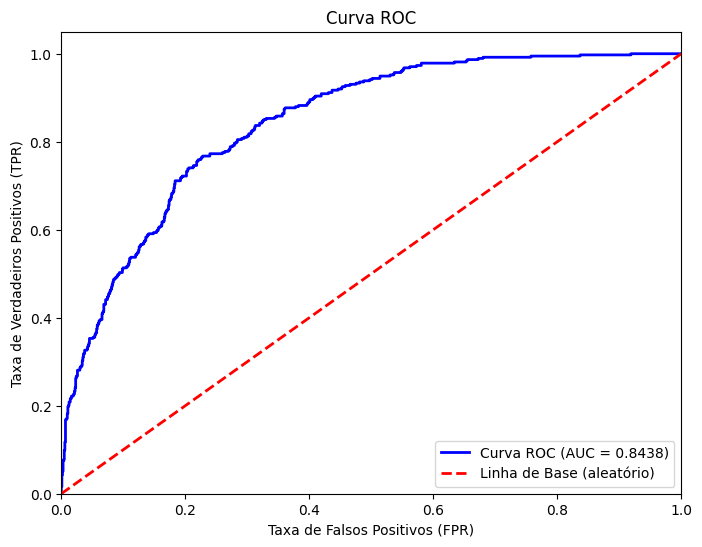

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 2. Utilize o modelo treinado para fazer previsões nos dados de teste
if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
    print("✔️ Model, X_test e y_test encontrados. Calculando métricas de avaliação.")

    y_pred = model.predict(X_test)

    # Obter probabilidades para a curva ROC
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilidades da classe positiva (Churn = 1)

    # 3. Calcule a acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # 4. Calcule a precisão
    precision = precision_score(y_test, y_pred)

    # 5. Calcule o recall
    recall = recall_score(y_test, y_pred)

    # 6. Calcule o F1-score
    f1 = f1_score(y_test, y_pred)

    # 7. Calcule a área sob a curva ROC (ROC AUC)
    roc_auc = roc_auc_score(y_test, y_proba)

    # 8. Imprima os valores calculados
    print(f"\nAcurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # 9. Gere a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # 10. Plote a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Linha de Base (aleatório)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')

    # 11. Exiba o gráfico
    plt.show()
else:
    print("❌ Variáveis 'model', 'X_test' ou 'y_test' não encontradas ou vazias. Não é possível avaliar o modelo.")

## Segmentação de clientes

### Subtask:
Aplicar técnicas de clustering para segmentar os clientes com base em suas características.

**Reasoning**:
Import the necessary KMeans class from sklearn.cluster and select the features for segmentation.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Importar matplotlib para o método do cotovelo
import seaborn as sns # Importar seaborn para melhorar a visualização (opcional)
import numpy as np # Importar numpy para np.number

# Select features for segmentation
# Using numerical features and some key categorical features that have shown relevance in EDA
# Ensure selected columns exist in X
segmentation_features = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'account.Charges.Total_per_Tenure',
    'internet.HasMultipleServices',
    'customer.SeniorCitizen',
    'account.Contract_Month-To-Month',
    'account.Contract_One Year',
    'account.Contract_Two Year',
    'internet.InternetService_Dsl',
    'internet.InternetService_Fiber Optic',
    'internet.InternetService_No'
]

# Filter to include only columns present in X
X_segmentation_cols = [col for col in segmentation_features if col in X.columns]
X_segmentation = X[X_segmentation_cols]

print(f"Features selected for segmentation ({len(X_segmentation_cols)}): {X_segmentation_cols}")
print("\nFirst 5 rows of X_segmentation:")
display(X_segmentation.head())

# Determine the optimal number of clusters (K) using the Elbow Method
inertia = []
# Iterate over a range of possible values of K (e.g., from 1 to 10)
k_range = range(1, 11)

print("\nDetermining optimal number of clusters using Elbow Method...")
for k in k_range:
    # Instantiate KMeans with n_clusters=K and random_state=42
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for newer KMeans versions
    # Train the model
    kmeans.fit(X_segmentation)
    # Add the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nElbow method plot displayed above. Choose K based on the 'elbow' point.")